In [1]:
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dataset

int_columns = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
               'count_floors_pre_eq', 'age', 'area_percentage', 
               'height_percentage']
categ_columns = ['land_surface_condition', 'foundation_type', 'roof_type',
                 'ground_floor_type', 'other_floor_type', 'position',
                 'plan_configuration',
                 ]
binary_columns = ['has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
                  'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone',
                  'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick',
                  'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_engineered',
                  'has_superstructure_other'
                  ]

n_datapoints = 10000
# Get Dataset
X_train, y_train, X_val, y_val = dataset.train_data()
target = y_train[:n_datapoints]
data = pd.DataFrame(X_train[:n_datapoints])
print(data.shape)


def show_plot(x, y):
    df = pd.DataFrame(data)
    df['target']=target
    df['x']=x
    df['y']=y
    plt.figure(figsize=(16,7))
    sns.scatterplot(x='x',y='y',hue='target',data=df,
                legend="full")
    plt.show()

Size information:
	 Number of Training Samples: 3502464
	 Number of Validation Samples: 875616
(10000, 14)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.038s...


C:\Users\stero\anaconda3\envs\richter-predictor\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\stero\anaconda3\envs\richter-predictor\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 10000 samples in 1.035s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.672032
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.412857
[t-SNE] KL divergence after 1000 iterations: 1.390799


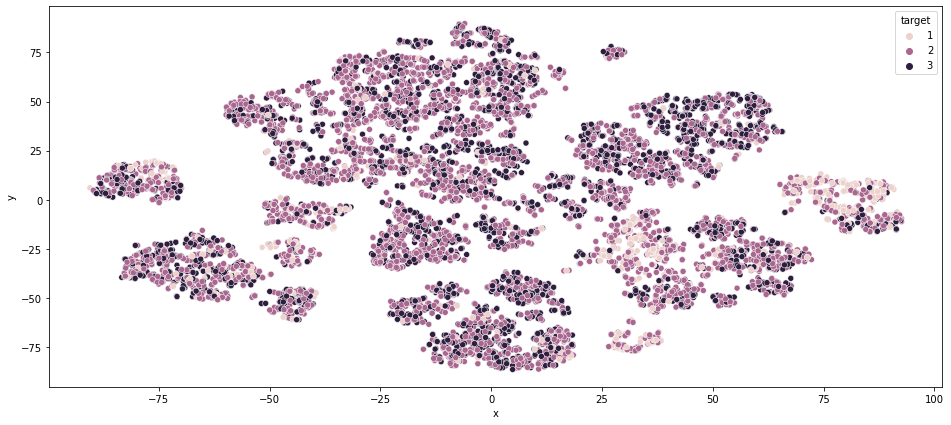

In [2]:
data = pd.DataFrame(X_train[:n_datapoints])
tSNE=TSNE(n_components=2, verbose=1, n_jobs=-1)
tSNE_result=tSNE.fit_transform(data)
x=tSNE_result[:,0]
y=tSNE_result[:,1]
show_plot(x,y)

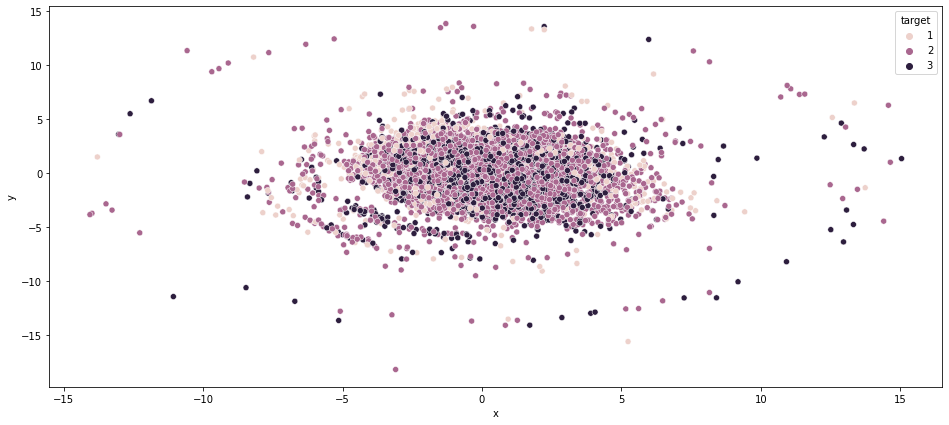

In [3]:
data = pd.DataFrame(X_train[:n_datapoints])
mds=MDS(n_components=2, verbose=1, n_jobs=-1)
mds_result=mds.fit_transform(data)
x=mds_result[:,0]
y=mds_result[:,1]
show_plot(x,y)

C:\Users\stero\anaconda3\envs\richter-predictor\lib\site-packages\sklearn\manifold\_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\stero\anaconda3\envs\richter-predictor\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


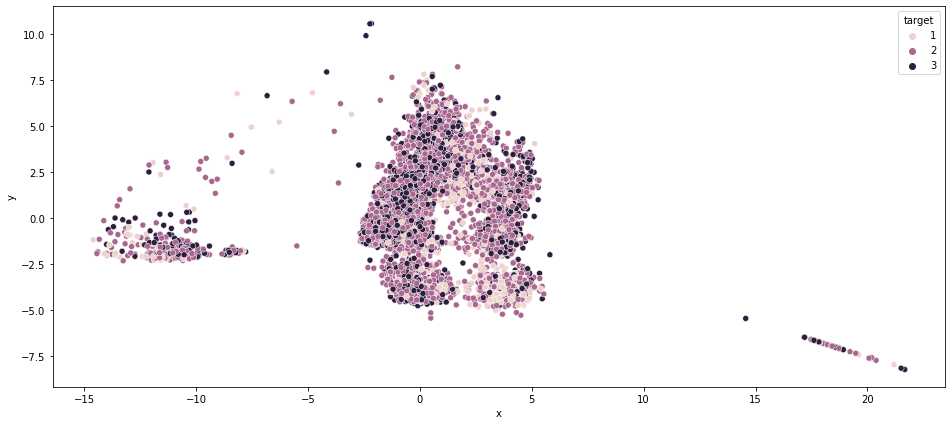

In [4]:
data = pd.DataFrame(X_train[:n_datapoints])
iso=Isomap(n_components=2, n_neighbors=50, n_jobs=-1)
iso_result=iso.fit_transform(data)
x=iso_result[:,0]
y=iso_result[:,1]
show_plot(x,y)

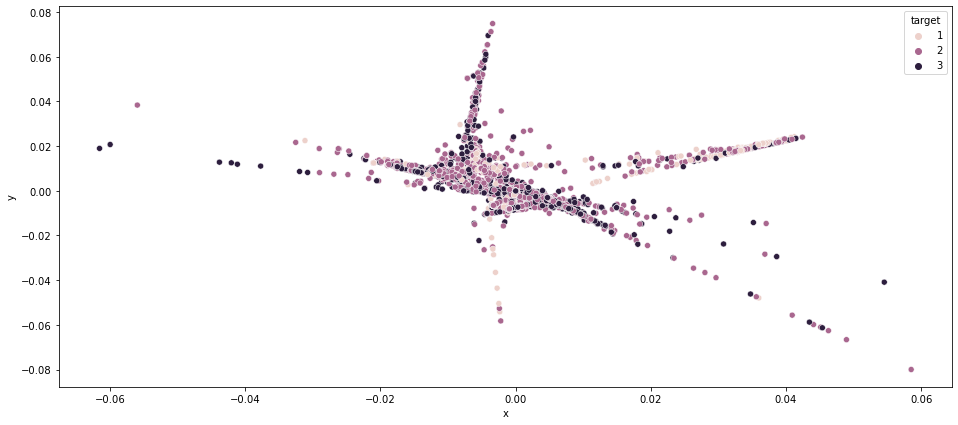

In [5]:
data = pd.DataFrame(X_train[:n_datapoints])
LLE=LocallyLinearEmbedding(n_components=2, n_jobs=-1)
LLE_result=LLE.fit_transform(data)
x=LLE_result[:,0]
y=LLE_result[:,1]
show_plot(x,y)

(10000, 14)


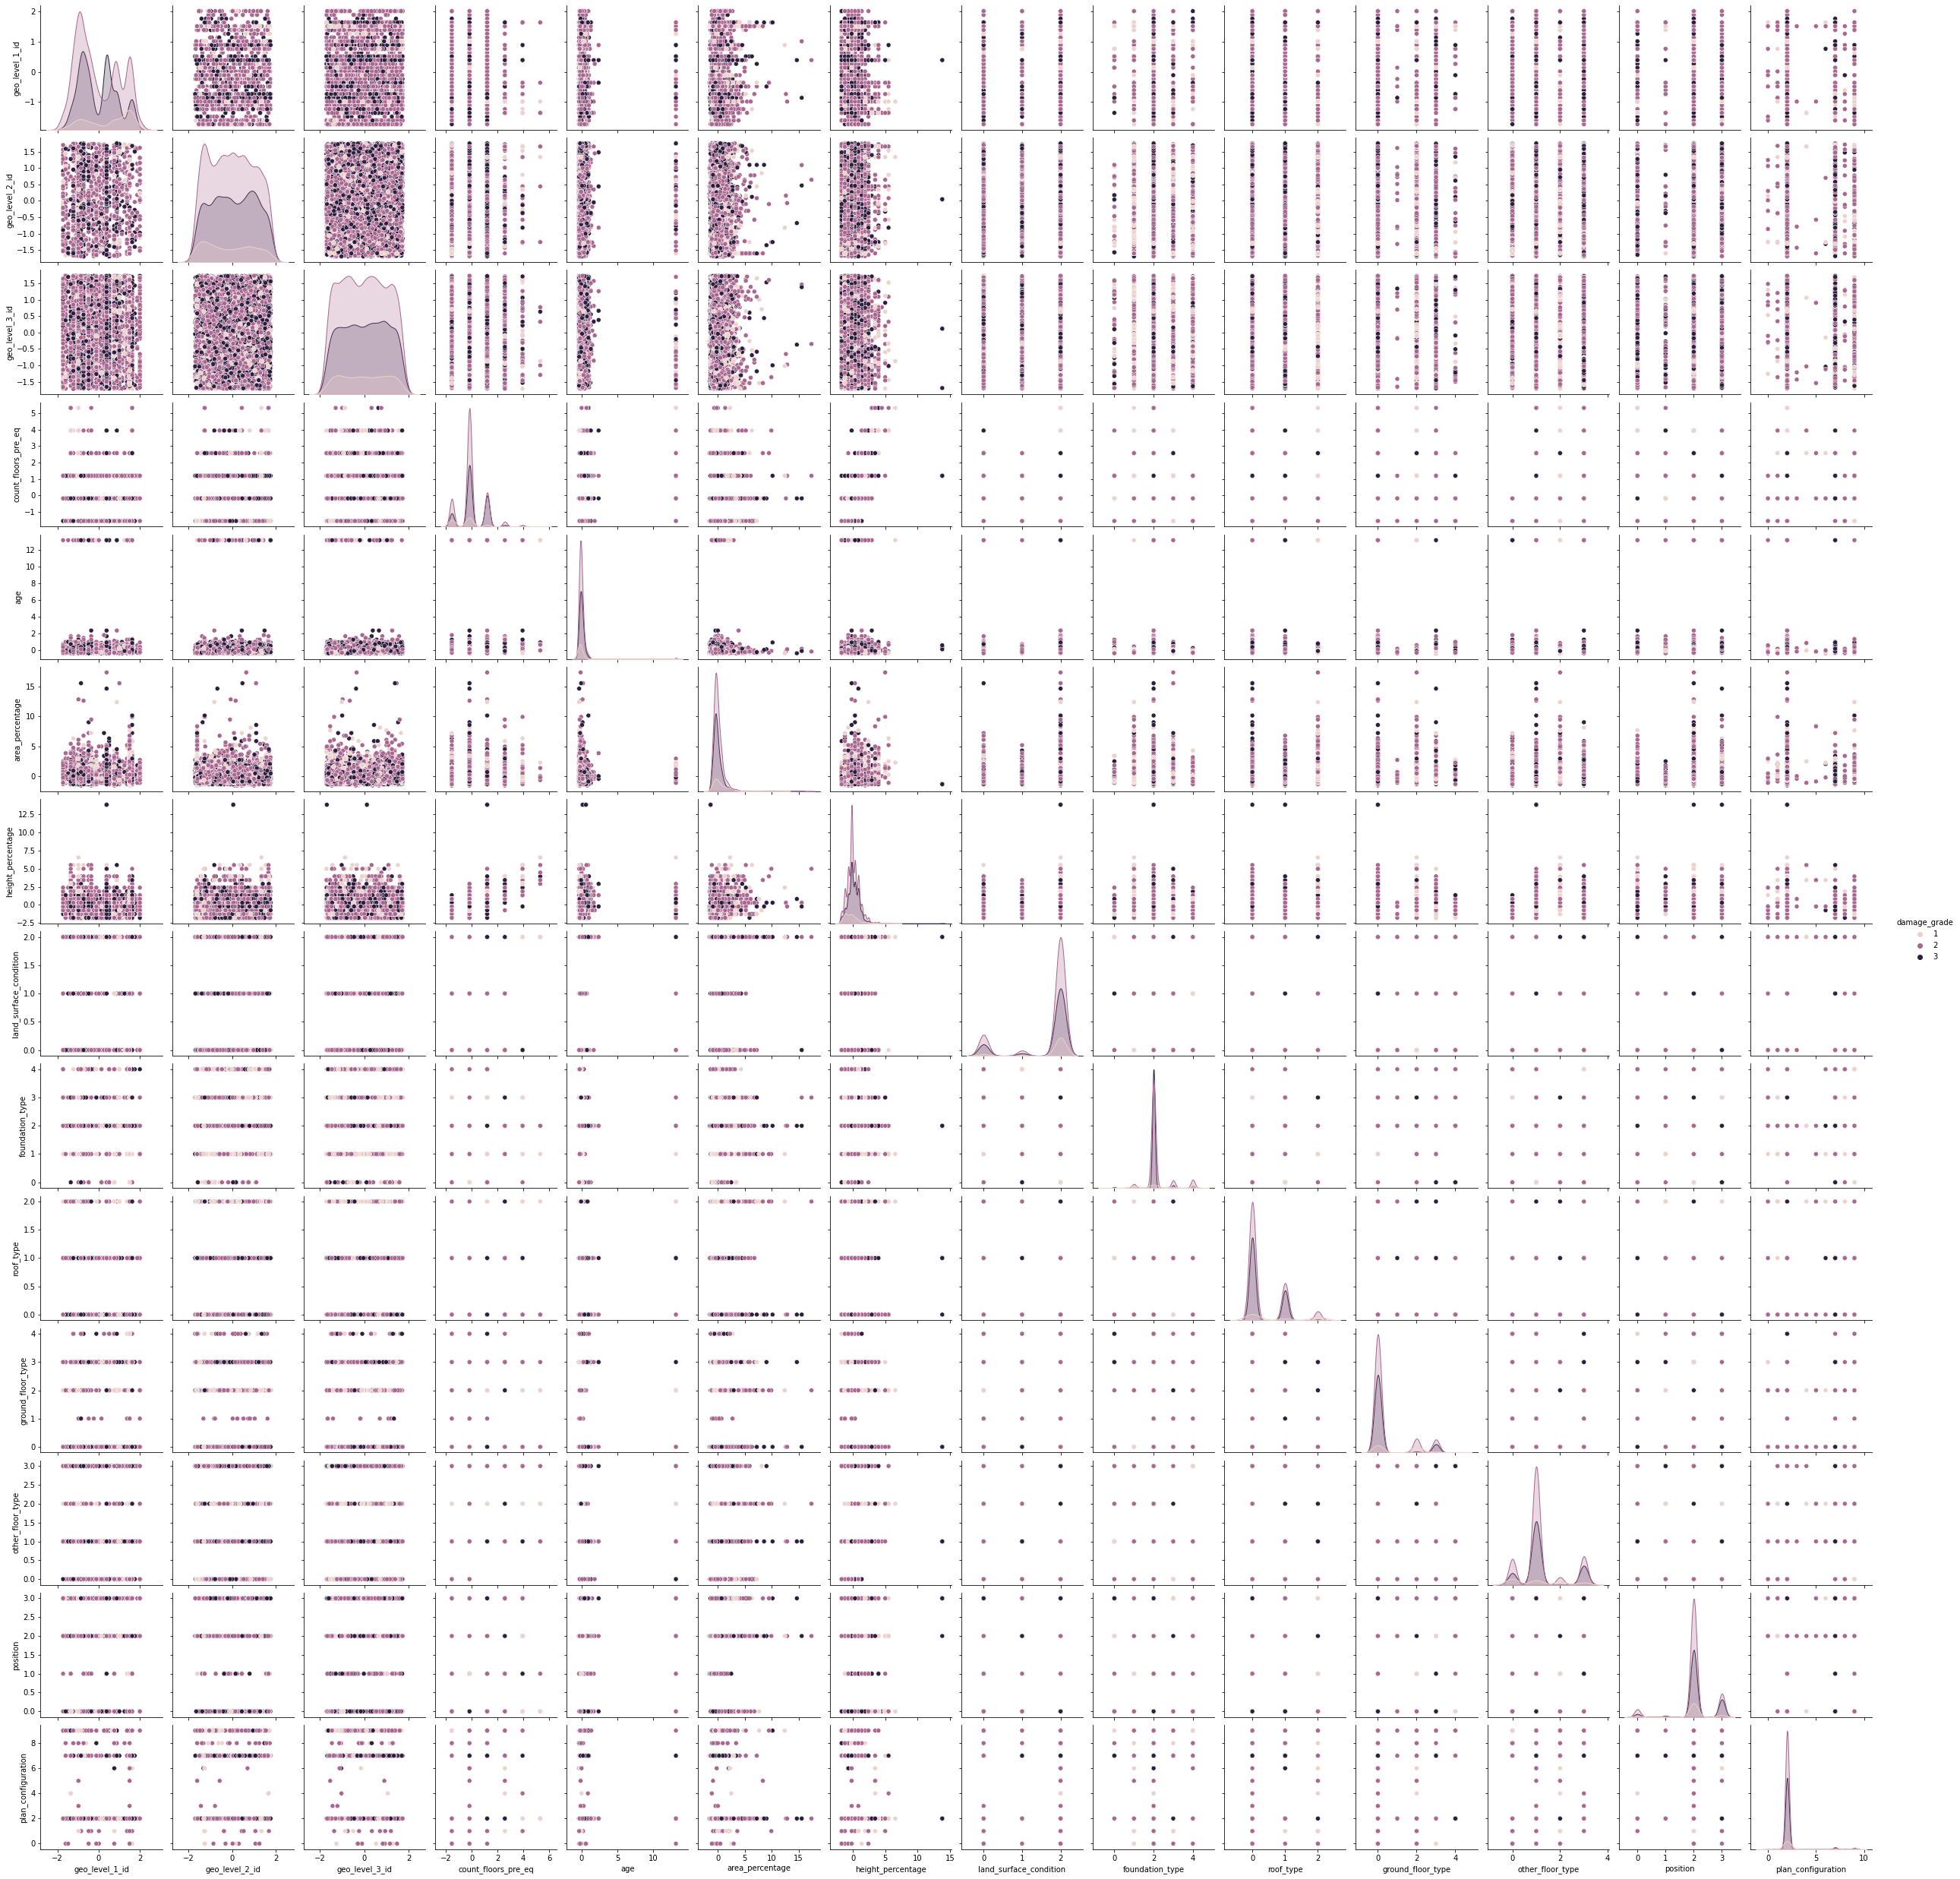

In [6]:
data = pd.DataFrame(X_train[:n_datapoints])
print(data.shape)
data['damage_grade'] = target
newCols = int_columns + categ_columns + ["damage_grade"]
data.columns = newCols
sns.pairplot(data, hue="damage_grade")